# Slow-roll, Rapid-turn inflation models
This notebook contains plotting code only. See the respective python scripts to
generate the data for the models

In [1]:
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

#Fontsize configuration
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', family='JetBrains Mono')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#Other matplotlib configuration
plt.rcParams['figure.autolayout'] = True
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams.update({
  "text.usetex": True,
  "text.latex.preamble": "\\usepackage{mathtools}"
})
plt.ioff()

## Angular Inflation

In [2]:
#load data
model='angular'
leading = np.load(f"./out/{model}_leading.npy")
exact = np.load(f"./out/{model}_exact.npy")
vzero = np.load(f"./out/{model}_qdif.npy")
potential = np.load(f"./out/{model}_potential.npy")
delta = np.load(f"./out/{model}_delta.npy")
omega = np.load(f"./out/{model}_omega.npy")
epsilon = np.load(f"./out/{model}_epsilon.npy")
x, y = np.load("./trajectories/angular_phix.npy"), np.load("./trajectories/angular_phiy.npy")

extent = (-1.05, 1.05, -1.05, 1.05)
ratio = (extent[1] - extent[0]) / (extent[-1] - extent[-2])

/tmp/ipykernel_290904/3238766833.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


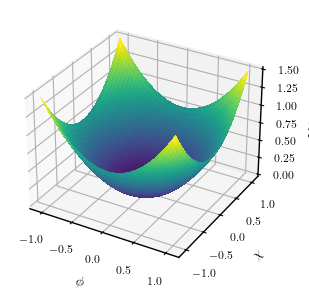

In [3]:
#plot of the potential
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(4,3))
phi = np.linspace(extent[0],extent[1],potential.shape[0])
chi = np.linspace(extent[2],extent[3],potential.shape[1])
surf = ax.plot_surface(*np.meshgrid(phi, chi), potential, cmap='viridis', antialiased=False)
ax.set_xlabel('$\\phi$')
ax.set_ylabel('$\\chi$')
ax.set_zlabel('$V(\\phi,\\chi)$')

fig.savefig(f"./figs/{model}_potential.pdf", transparent=True)
fig.tight_layout()
fig.show()

<>:48: SyntaxWarning: invalid escape sequence '\p'
<>:49: SyntaxWarning: invalid escape sequence '\c'
<>:48: SyntaxWarning: invalid escape sequence '\p'
<>:49: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_290904/3347436608.py:48: SyntaxWarning: invalid escape sequence '\p'
  ax.set_xlabel('$\phi$')
/tmp/ipykernel_290904/3347436608.py:49: SyntaxWarning: invalid escape sequence '\c'
  ax1.set_ylabel('$\chi$')
/tmp/ipykernel_290904/3347436608.py:55: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


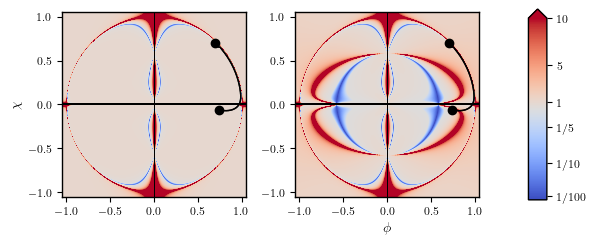

In [4]:
#side-by-side plot of exact and leading-order evaluations
two_norm = mpl.colors.TwoSlopeNorm(0.25, vmax=10)
cmap = mpl.colormaps['coolwarm'].copy()
cmap.set_over(cmap(1.0))
cmap.set_bad(mpl.colors.CSS4_COLORS['black'])

fig, (ax1, ax2, cax) = plt.subplots(1,3,
  figsize=((6,2.5)),
  width_ratios=[1, 1, 0.1]
)

img1 = ax1.imshow(
  np.transpose(leading),
  extent = extent,
  cmap = cmap,
  norm = two_norm,
  origin = 'lower',
  aspect = ratio
)

img2 = ax2.imshow(
  np.transpose(exact),
  extent = extent,
  cmap = cmap,
  norm = two_norm,
  origin = 'lower',
  aspect = ratio
)

#colorbar
cbar = plt.colorbar(
  img2,
  extend='max',
  location='right',
  ticks=[1/100, 1/10, 1/5, 1, 5, 10],
  cax=cax
)
cax.set_yticklabels(['1/100','1/10','1/5', '1', '5', '10'])

#trajectories
for ax in [ax1, ax2]:
  ax.plot(x, y, color='black')
  ax.scatter(
    [x[0], x[-1]],
    [y[0], y[-1]],
    color='black'
  )
ax.set_xlabel('$\phi$')
ax1.set_ylabel('$\chi$')

ax2.plot(x, y, color='black')
ax1.plot(x, y, color='black')

fig.savefig(f"./figs/{model}.pdf", transparent=True)
fig.show()

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(
  np.transpose(vzero),
  extent = extent,
  cmap = 'binary',
  origin = 'lower',
  aspect=ratio
)
plt.xlabel('$\phi$')
plt.ylabel('$\chi$')
plt.savefig(f"./figs/{model}_vzero.pdf", transparent=True, pad_inches=0.05)
plt.show()

In [ ]:
plt.figure(figsize=(4,3))
plot = plt.imshow(
  np.transpose(delta),
  extent= extent,
  cmap= 'coolwarm',
  origin= 'lower',
  aspect= ratio,
  vmin= -np.pi/2,
  vmax= np.pi/2
)

plt.plot(x, y, color='black')
plt.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

cbar = plt.colorbar(plot, ticks=[np.pi*n/4 for n in np.arange(-2, 3)])
cbar.set_ticklabels(['$-\\pi/2$','$-\\pi/4$','$0$','$\\pi/4$','$\\pi/2$'])
plt.xlabel('$\phi$')
plt.ylabel('$\chi$')
plt.savefig("./figs/angular_delta.pdf", transparent=True, pad_inches=0.05)
plt.show()

<>:19: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:19: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_651541/1658292162.py:19: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('$\phi$')
/tmp/ipykernel_651541/1658292162.py:20: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('$\chi$')


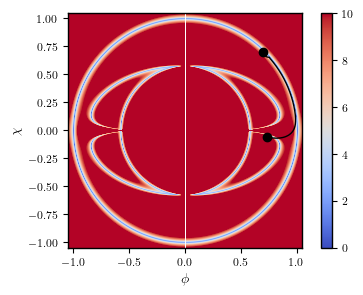

In [5]:
plt.figure(figsize=(4,3))
plot = plt.imshow(
  np.transpose(omega),
  extent= extent,
  cmap= 'coolwarm',
  origin= 'lower',
  aspect= ratio,
  vmax=10
)

plt.plot(x, y, color='black')
plt.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

cbar = plt.colorbar(plot)
plt.xlabel('$\phi$')
plt.ylabel('$\chi$')
plt.savefig("./figs/angular_omega.pdf", transparent=True, pad_inches=0.05)
plt.show()

<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_651541/238587605.py:18: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('$\phi$')
/tmp/ipykernel_651541/238587605.py:19: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('$\chi$')


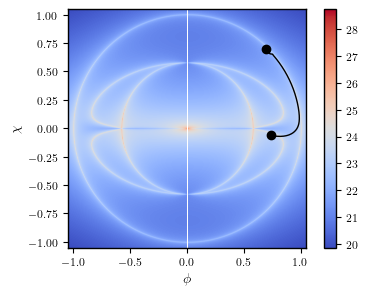

In [12]:
plt.figure(figsize=(4,3))
plot = plt.imshow(
  np.log10(np.transpose(epsilon)),
  extent= extent,
  cmap= 'coolwarm',
  origin= 'lower',
  aspect= ratio,
)
cbar = plt.colorbar(plot)

plt.plot(x, y, color='black')
plt.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

plt.xlabel('$\phi$')
plt.ylabel('$\chi$')
plt.savefig("./figs/angular_epsilon.pdf", transparent=True, pad_inches=0.05)
plt.show()

## EGNO supergravity

In [3]:
#load data
model = "egno"
leading = np.load(f"./out/{model}_leading.npy")
exact = np.load(f"./out/{model}_exact.npy")
vzero = np.load(f"./out/{model}_qdif.npy")
potential = np.load(f"./out/{model}_potential.npy")
delta = np.load(f"./out/{model}_delta.npy")
omega = np.load(f"./out/{model}_omega.npy")
epsilon = np.load(f"./out/{model}_epsilon.npy")
x, y = np.load("./trajectories/egno_r.npy"), np.load("./trajectories/egno_theta.npy")

extent = (0.46, 0.50, 0.0, np.pi)
ratio = (extent[1] - extent[0]) / (extent[-1] - extent[-2])

/tmp/ipykernel_671605/1388015561.py:5: RuntimeWarning: divide by zero encountered in log10
  potential = np.transpose(np.log10(np.abs(potential)))
/tmp/ipykernel_671605/1388015561.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


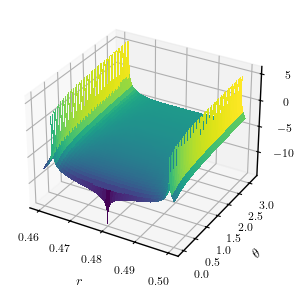

In [16]:
#plot of the potential
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(4,3))
phi = np.linspace(extent[0],extent[1],potential.shape[0])
chi = np.linspace(extent[2],extent[3],potential.shape[1])
potential = np.transpose(np.log10(np.abs(potential)))
surf = ax.plot_surface(*np.meshgrid(phi, chi), potential, cmap='viridis', antialiased=False)
ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_zlabel('$V(r,\\theta)$')

fig.savefig(f"./figs/{model}_potential.pdf", transparent=True)
fig.tight_layout()
fig.show()

/tmp/ipykernel_290904/1177432048.py:59: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


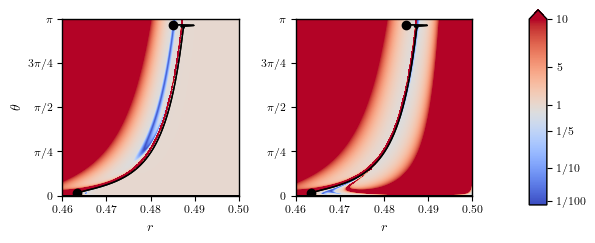

In [28]:
#side-by-side plot of exact and leading-order evaluations
two_norm = mpl.colors.TwoSlopeNorm(0.25, vmax=10)
cmap = mpl.colormaps['coolwarm'].copy()
cmap.set_over(cmap(1.0))
cmap.set_bad(mpl.colors.CSS4_COLORS['black'])

fig, (ax1, ax2, cax) = plt.subplots(1,3,
  figsize=((6,2.5)),
  width_ratios=[1, 1, 0.1]
)

img1 = ax1.imshow(
  np.transpose(leading),
  extent = extent,
  cmap = cmap,
  norm = two_norm,
  origin = 'lower',
  aspect = ratio
)

img2 = ax2.imshow(
  np.transpose(exact),
  extent = extent,
  cmap = cmap,
  norm = two_norm,
  origin = 'lower',
  aspect = ratio
)

#colorbar
cbar = plt.colorbar(
  img2,
  extend='max',
  location='right',
  ticks=[1/100, 1/10, 1/5, 1, 5, 10],
  cax=cax
)
cax.set_yticklabels(['1/100','1/10','1/5', '1', '5', '10'])

#trajectories
for ax in [ax1, ax2]:
  ax.plot(x, y, color='black')
  ax.scatter(
    [x[0], x[-1]],
    [y[0], y[-1]],
    color='black'
  )
  ax.set_xlabel('$r$')
  ax.set_yticks(
    [np.pi*x/4 for x in range(0, 5)],
    labels=['0', '$\\pi/4$', '$\\pi/2$', '$3\\pi/4$', '$\\pi$']
  )
ax1.set_ylabel('$\\theta$')

ax2.plot(x, y, color='black')
ax1.plot(x, y, color='black')

fig.savefig("./figs/egno.pdf", transparent=True)
fig.show()

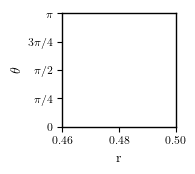

In [29]:
plt.figure(figsize=(2,2))
plt.imshow(
  np.transpose(vzero),
  extent = extent,
  cmap = 'binary',
  origin = 'lower',
  aspect=ratio
)
plt.xlabel('r')
plt.ylabel('$\\theta$')
plt.yticks(
  [np.pi*x/4 for x in range(0, 5)],
  labels=['0', '$\\pi/4$', '$\\pi/2$', '$3\\pi/4$', '$\\pi$']
)
plt.savefig("./figs/egno_vzero.pdf", transparent=True)
plt.show()

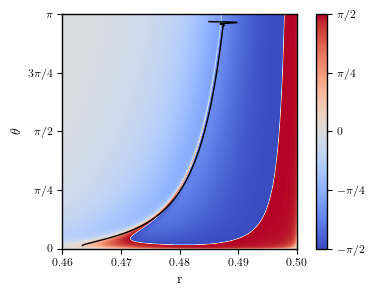

In [30]:
plt.figure(figsize=(4,3))
plot = plt.imshow(
  np.transpose(delta),
  extent= extent,
  cmap= 'coolwarm',
  origin= 'lower',
  aspect= ratio,
  vmin= -np.pi/2,
  vmax= np.pi/2
)
cbar = plt.colorbar(plot, ticks=[np.pi*n/4 for n in np.arange(-2, 3)])
cbar.set_ticklabels(['$-\\pi/2$','$-\\pi/4$','$0$','$\\pi/4$','$\\pi/2$'])
plt.plot(x, y, color='black')
plt.xlabel('r')
plt.ylabel('$\\theta$')
plt.yticks(
  [np.pi*x/4 for x in range(0, 5)],
  labels=['0', '$\\pi/4$', '$\\pi/2$', '$3\\pi/4$', '$\\pi$']
)
plt.savefig("./figs/egno_delta.pdf", transparent=True, pad_inches=0.05)
plt.show()

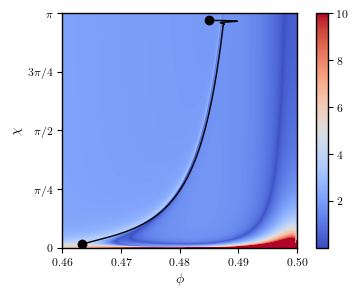

In [35]:
plt.figure(figsize=(4,3))
plot = plt.imshow(
  np.transpose(omega),
  extent= extent,
  cmap= 'coolwarm',
  origin= 'lower',
  aspect= ratio,
  vmax=10
)

plt.plot(x, y, color='black')
plt.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

plt.yticks(
  [np.pi*x/4 for x in range(0, 5)],
  labels=['0', '$\\pi/4$', '$\\pi/2$', '$3\\pi/4$', '$\\pi$']
)

cbar = plt.colorbar(plot)
plt.xlabel('$\\phi$')
plt.ylabel('$\\chi$')
plt.savefig("./figs/egno_omega.pdf", transparent=True, pad_inches=0.05)
plt.show()

<>:19: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:19: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_19261/842522712.py:19: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('$\phi$')
/tmp/ipykernel_19261/842522712.py:20: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('$\chi$')


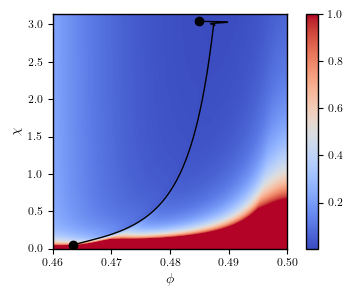

In [6]:
plt.figure(figsize=(4,3))
plot = plt.imshow(
  np.transpose(epsilon),
  extent= extent,
  cmap= 'coolwarm',
  origin= 'lower',
  aspect= ratio,
  vmax=1
)
cbar = plt.colorbar(plot)

plt.plot(x, y, color='black')
plt.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

plt.xlabel('$\phi$')
plt.ylabel('$\chi$')
plt.savefig("./figs/egno_epsilon.pdf", transparent=True, pad_inches=0.05)
plt.show()

## D5-brane models

In [7]:
#load data
model = "d5"
leading = np.load(f"./out/{model}_leading.npy")
exact = np.load(f"./out/{model}_exact.npy")
vzero = np.load(f"./out/{model}_qdif.npy")
potential = np.load(f"./out/{model}_potential.npy")
delta = np.load(f"./out/{model}_delta.npy")
omega = np.load(f"./out/{model}_omega.npy")
epsilon = np.load(f"./out/{model}_epsilon.npy")
trajectory = np.loadtxt(f"./trajectories/d5_trajectory.dat")
x, y = trajectory[:,0], trajectory[:, 1]

extent = (0.0, 36.0, 0.0, 4*np.pi)
ratio = (extent[1] - extent[0]) / (extent[-1] - extent[-2])

/tmp/ipykernel_290904/112080455.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.savefig(f"./figs/{model}_potential.pdf", transparent=True)
/tmp/ipykernel_290904/112080455.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


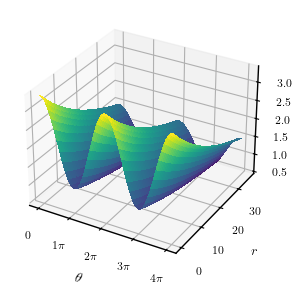

In [10]:
#plot of the potential
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(4,3))
x = np.linspace(extent[2],extent[3],potential.shape[1])
y = np.linspace(extent[0],extent[1],potential.shape[0])
pot = potential#np.log10(np.abs(potential))
surf = ax.plot_surface(*np.meshgrid(x, y), pot, cmap='viridis', antialiased=False)
ax.set_ylabel('$r$')
ax.set_xlabel('$\\theta$')
ax.set_zlabel('$V(r,\\theta)$')
ax.set_xticks(np.pi*np.arange(0, 5), labels=['$0$'] + [f'${n}\\pi$' for n in range(1, 5)])

fig.savefig(f"./figs/{model}_potential.pdf", transparent=True)
fig.tight_layout()
fig.show()

<>:51: SyntaxWarning: invalid escape sequence '\p'
<>:51: SyntaxWarning: invalid escape sequence '\p'
<>:51: SyntaxWarning: invalid escape sequence '\p'
<>:51: SyntaxWarning: invalid escape sequence '\p'
<>:51: SyntaxWarning: invalid escape sequence '\p'
<>:51: SyntaxWarning: invalid escape sequence '\p'
<>:51: SyntaxWarning: invalid escape sequence '\p'
<>:51: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_290904/1899283300.py:51: SyntaxWarning: invalid escape sequence '\p'
  labels=['0', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$']
/tmp/ipykernel_290904/1899283300.py:51: SyntaxWarning: invalid escape sequence '\p'
  labels=['0', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$']
/tmp/ipykernel_290904/1899283300.py:51: SyntaxWarning: invalid escape sequence '\p'
  labels=['0', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$']
/tmp/ipykernel_290904/1899283300.py:51: SyntaxWarning: invalid escape sequence '\p'
  labels=['0', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$']
/tmp/ipykernel_290904/1899283300.py:59: 

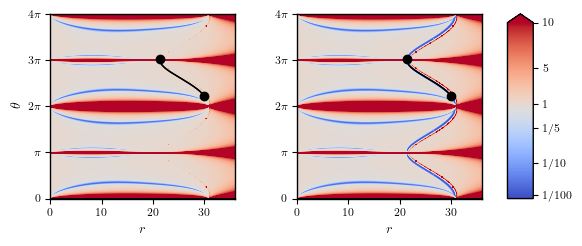

In [14]:
#side-by-side plot of exact and leading-order evaluations
two_norm = mpl.colors.TwoSlopeNorm(0.25, vmax=10)
cmap = mpl.colormaps['coolwarm'].copy()
cmap.set_over(cmap(1.0))
cmap.set_bad(mpl.colors.CSS4_COLORS['black'])

fig, (ax1, ax2, cax) = plt.subplots(1,3,
  figsize=(6,2.5),
  width_ratios=[1, 1, 0.1]
)

img1 = ax1.imshow(
  np.transpose(leading),
  extent = extent,
  cmap = cmap,
  norm = two_norm,
  origin = 'lower',
  aspect = ratio
)

img2 = ax2.imshow(
  np.transpose(exact),
  extent = extent,
  cmap = cmap,
  norm = two_norm,
  origin = 'lower',
  aspect = ratio
)

#colorbar
cbar = plt.colorbar(
  img2,
  extend='max',
  location='right',
  ticks=[1/100, 1/10, 1/5, 1, 5, 10],
  cax=cax
)
cax.set_yticklabels(['1/100','1/10','1/5', '1', '5', '10'])

#trajectories
for ax in [ax1, ax2]:
  ax.plot(x, y, color='black')
  ax.scatter(
    [x[0], x[-1]],
    [y[0], y[-1]],
    color='black'
  )
  ax.set_xlabel('$r$')
  ax.set_yticks(
    [np.pi*x for x in range(0, 5)],
    labels=['0', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$']
  )
ax1.set_ylabel('$\\theta$')

ax2.plot(x, y, color='black')
ax1.plot(x, y, color='black')

fig.savefig("./figs/d5.pdf", transparent=True, pad_inches=0.05)
fig.show()

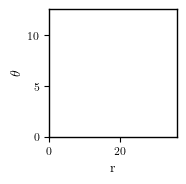

In [16]:
plt.figure(figsize=(2,2))
plt.imshow(
  np.transpose(vzero),
  extent = extent,
  cmap = 'binary',
  origin = 'lower',
  aspect=ratio
)
plt.xlabel('r')
plt.ylabel('$\\theta$')
plt.savefig("./figs/d5_vzero.pdf", transparent=True, pad_inches=0.05)
plt.show()

<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:18: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_290904/1963687952.py:18: SyntaxWarning: invalid escape sequence '\p'
  labels=['0', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$']
/tmp/ipykernel_290904/1963687952.py:18: SyntaxWarning: invalid escape sequence '\p'
  labels=['0', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$']
/tmp/ipykernel_290904/1963687952.py:18: SyntaxWarning: invalid escape sequence '\p'
  labels=['0', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$']
/tmp/ipykernel_290904/1963687952.py:18: SyntaxWarning: invalid escape sequence '\p'
  labels=['0', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$']


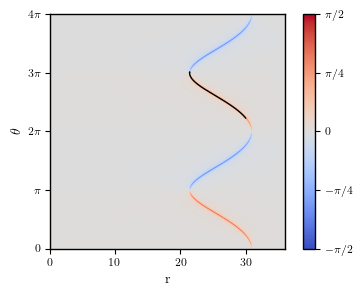

In [18]:
plt.figure(figsize=(4,3))
plot = plt.imshow(
  np.transpose(delta),
  extent= extent,
  cmap= 'coolwarm',
  origin= 'lower',
  aspect= ratio,
  vmin= -np.pi/2,
  vmax= np.pi/2
)
cbar = plt.colorbar(plot, ticks=[np.pi*n/4 for n in np.arange(-2, 3)])
cbar.set_ticklabels(['$-\\pi/2$','$-\\pi/4$','$0$','$\\pi/4$','$\\pi/2$'])
plt.xlabel('r')
plt.ylabel('$\\theta$')
plt.plot(x, y, color='black')
plt.yticks(
  [np.pi*x for x in range(0, 5)],
  labels=['0', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$']
)
plt.savefig("./figs/d5_delta.pdf", transparent=True, pad_inches=0.05)
plt.show()

<>:23: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_290904/1251696796.py:23: SyntaxWarning: invalid escape sequence '\p'
  labels=['0', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$']
/tmp/ipykernel_290904/1251696796.py:23: SyntaxWarning: invalid escape sequence '\p'
  labels=['0', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$']
/tmp/ipykernel_290904/1251696796.py:23: SyntaxWarning: invalid escape sequence '\p'
  labels=['0', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$']
/tmp/ipykernel_290904/1251696796.py:23: SyntaxWarning: invalid escape sequence '\p'
  labels=['0', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$']


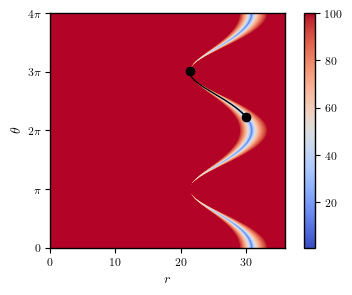

In [26]:
plt.figure(figsize=(4,3))
plot = plt.imshow(
  np.transpose(omega),
  extent= extent,
  cmap= 'coolwarm',
  origin= 'lower',
  aspect= ratio,
  vmax=100
)

plt.plot(x, y, color='black')
plt.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

cbar = plt.colorbar(plot)
plt.xlabel('$r$')
plt.ylabel('$\\theta$')
plt.yticks(
  [np.pi*x for x in range(0, 5)],
  labels=['0', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$']
)
plt.savefig("./figs/d5_omega.pdf", transparent=True, pad_inches=0.05)
plt.show()

<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_19261/2539323670.py:18: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('$\phi$')
/tmp/ipykernel_19261/2539323670.py:19: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('$\chi$')


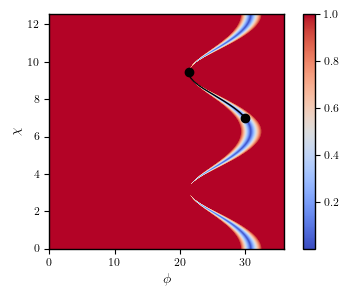

In [15]:
plt.figure(figsize=(4,3))
plot = plt.imshow(
  np.transpose(epsilon),
  extent= extent,
  cmap= 'coolwarm',
  origin= 'lower',
  aspect= ratio,
  vmax=1
)
cbar = plt.colorbar(plot)

plt.plot(x, y, color='black')
plt.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)
plt.xlabel('$\phi$')
plt.ylabel('$\chi$')
plt.savefig("./figs/d5_epsilon.pdf", transparent=True, pad_inches=0.05)
plt.show()